In [1]:
import Pkg;
Pkg.add("IntervalArithmetic")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [1]:
using IntervalArithmetic

In [2]:
T(x) = 2x + (1/64)*sin(4*π*x)#doubling(x) = mod(2*x, 1)

T (generic function with 1 method)

In [3]:
I = @interval 0 1

[0, 1]

In [9]:
using Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [4]:
using Plots

In [5]:
N = 20
X1 = [@interval i/N (i+1)/N for i in 0:N-1]

20-element Vector{Interval{Float64}}:
 [0, 0.0500001]
    [0.0499999, 0.100001]
    [0.0999999, 0.150001]
    [0.149999, 0.200001]
    [0.199999, 0.25]
    [0.25, 0.300001]
    [0.299999, 0.350001]
    [0.349999, 0.400001]
    [0.399999, 0.450001]
    [0.449999, 0.5]
    [0.5, 0.550001]
    [0.549999, 0.600001]
    [0.599999, 0.650001]
    [0.649999, 0.700001]
    [0.699999, 0.75]
    [0.75, 0.800001]
    [0.799999, 0.850001]
    [0.849999, 0.900001]
    [0.899999, 0.950001]
    [0.949999, 1]

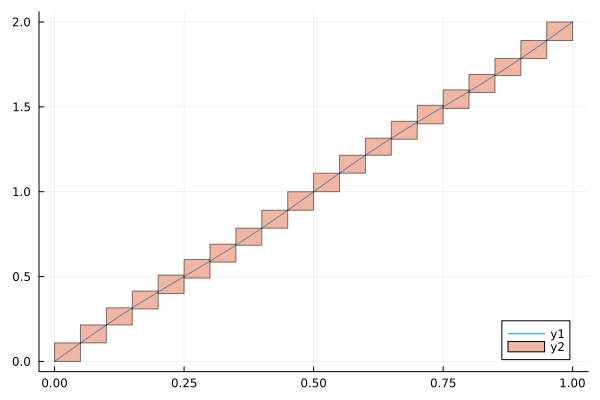

In [6]:
plot(T, 0, 1)
plot!(IntervalBox.(X1, T.(X1)))

In [7]:
g(x) = mod(2*x, 1)

g (generic function with 1 method)

In [9]:
Newton(f, fprime, I::Interval{T}) where {T} = intersect(Interval{T}(mid(I))-f(Interval{T}(mid(I)))/fprime(I), I)

Newton (generic function with 1 method)

In [10]:
I =  @interval 0 1

[0, 1]

In [18]:
I1=Interval{Float64}(I)

[0, 1]

In [14]:
g1(x) = mod(2*x+0.1*sin(2*pi*x), 1)

g1 (generic function with 1 method)

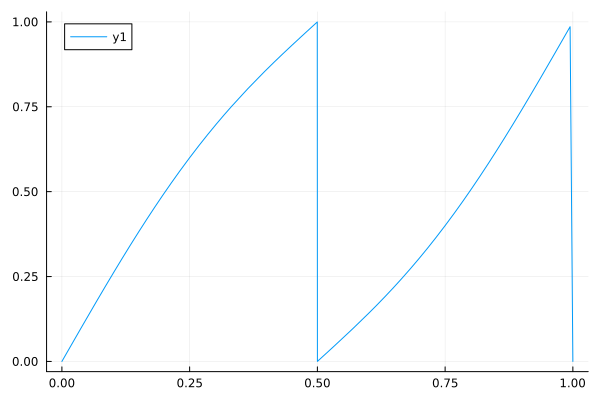

In [15]:
plot(g1, 0, 1)

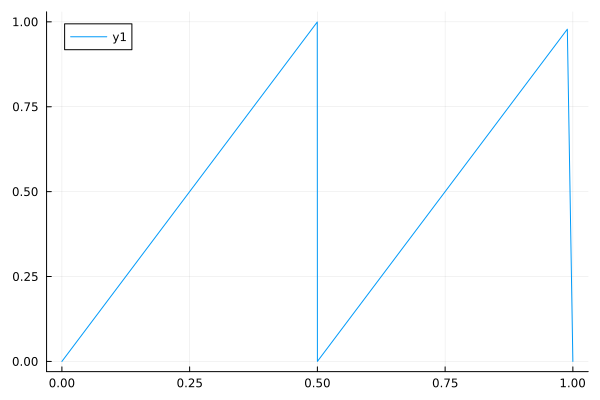

In [16]:
plot(g, 0, 1)

In [26]:
function orbit(f, x, n)
    v = Array{typeof(x), 1}(undef, n) #this declares an uninitialized vector
    v[1] = x
    for i in 2:n
        x = f(x)
        v[i] = x
    end
    return v
end

orbit (generic function with 1 method)

In [27]:
orbit(g,1/4,20)

20-element Vector{Float64}:
 0.25
 0.5
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [28]:
orbit(g,√2,20)

20-element Vector{Float64}:
 1.4142135623730951
 0.8284271247461903
 0.6568542494923806
 0.31370849898476116
 0.6274169979695223
 0.25483399593904466
 0.5096679918780893
 0.01933598375617862
 0.03867196751235724
 0.07734393502471448
 0.15468787004942897
 0.30937574009885793
 0.6187514801977159
 0.23750296039543173
 0.47500592079086346
 0.9500118415817269
 0.9000236831634538
 0.8000473663269076
 0.6000947326538153
 0.2001894653076306

In [30]:
I2 = Newton(g, 2, @interval 0 1)

LoadError: mod not defined for Interval{Float64}

In [16]:
using Pkg
Pkg.add("DualNumbers")

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [fa6b7ba4] + DualNumbers v0.6.8
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [31]:
using DualNumbers

In [32]:
Newton(f, I1) = Newton(f, x->(f(Dual(x, 1)).epsilon), I1)

Newton (generic function with 2 methods)

In [33]:
new_x = [Newton(g, x) for x in I1]

LoadError: mod not defined for Interval{Float64}